# Background
Education Technology has become an important part of the education system. This can be seen through the mass adoption of school issued devices and educational software. However, it is still under debate whether or not this technology is actually improving the quality of education. 

In this project, we will be analyzing the impact of educational technology on student performance. We will be using the OULAD dataset, which contains information about student performance in online courses offered across 4 years, as well as information about the student's background and the school's resources. We will be using this data to determine if there is a correlation between the use of educational technology resources and student performance.

After performing analysis, we will train a logistic regression machine learning model to predict whether or not a student will pass a course based on the student's background and the school's resources.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
info_df = pd.read_csv("/Users/danieldoh/Downloads/anonymisedData/studentInfo.csv")
assessment_df = pd.read_csv("/Users/danieldoh/Downloads/anonymisedData/studentAssessment.csv")
student_interactions = pd.read_csv('/Users/danieldoh/Downloads/anonymisedData/studentVle.csv')

In [37]:
#Vi
info_df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [39]:
asssessment_desc = pd.read_csv("/Users/danieldoh/Downloads/anonymisedData/assessments.csv")
asssessment_desc.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


<Axes: xlabel='final_result'>

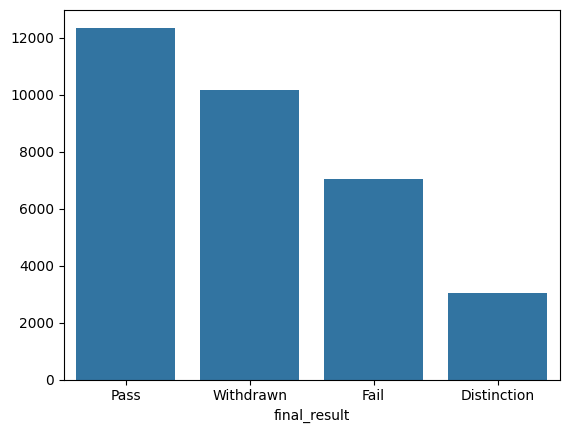

In [40]:
info_df['final_result'].value_counts().index
sns.barplot(x=info_df['final_result'].value_counts().index, y = info_df['final_result'].value_counts().values)

In [41]:
student_interactions.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [4]:
student_interactions['code_module'].unique()

df_AAA = student_interactions[student_interactions['code_module'] == 'AAA']
df_BBB =  student_interactions[student_interactions['code_module'] == 'BBB']
df_CCC =  student_interactions[student_interactions['code_module'] == 'CCC']
df_DDD =  student_interactions[student_interactions['code_module'] == 'DDD']


info_df_AAA = info_df[info_df['code_module'] == 'AAA']
info_df_BBB =  info_df[info_df['code_module'] == 'BBB']
info_df_CCC =  info_df[info_df['code_module'] == 'CCC']
info_df_DDD =  info_df[info_df['code_module'] == 'DDD']

In [43]:
#Now that's a lot of resources.
df_AAA['id_site'].unique()

array([ 546652,  546614,  546714,  546876,  546688,  546662,  546890,
        547011,  547013,  546871,  546879,  546672,  546660,  546667,
        546681,  546670,  546719,  546732,  546668,  546671,  546731,
        546986,  546669,  546700,  547009,  546883,  546874,  546900,
        546948,  547050,  546970,  546961,  546952,  546943,  546911,
        546975,  547020,  546990,  546684,  546907,  546701,  546723,
        546903,  546954,  546894,  546873,  546983,  546689,  546982,
        546896,  546678,  546738,  546716,  546725,  546676,  546680,
        546739,  547030,  546921,  546920,  546917,  546916,  546913,
        547035,  546984,  546971,  546901,  546740,  546987,  546734,
        546733,  546989,  546995,  546991,  546923,  546925,  546992,
        546922,  546933,  546735,  546885,  546884,  546972,  546889,
        546891,  547028,  546715,  546665,  546927,  546708,  547049,
        546682,  546702,  546675,  546899,  547008,  547018,  547032,
        547015,  546

In [44]:
def get_10_largest(dataframe):
    j = {}
    for i in dataframe['id_site'].unique():
        j[i] = (df_AAA.loc[df_AAA['id_site'] == i, 'sum_click'].sum())
    sorted_pairs = sorted(j.items(), key = lambda x: x[1], reverse = True)
    top_10 = sorted_pairs[:10]
    top_10 = dict(top_10)
    plot_figure(top_10, dataframe['code_module'].iloc[1])



In [45]:
def plot_figure(top_10, dataframe):
    plt.figure(figsize=(8, 5))
    sns.barplot(x=list(top_10.keys()), y=list(top_10.values()), palette='Blues_d', order = list(top_10.keys()))
    plt.xlabel('Resource ID')
    plt.ylabel('Total clicks')
    plt.title('Top 10 most used resources in module {name}'.format(name = dataframe))
    plt.show()
    


/var/folders/j8/tl0_lbl13hzgnfgmslz4hyfc0000gn/T/ipykernel_28980/3276011085.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_10.keys()), y=list(top_10.values()), palette='Blues_d', order = list(top_10.keys()))


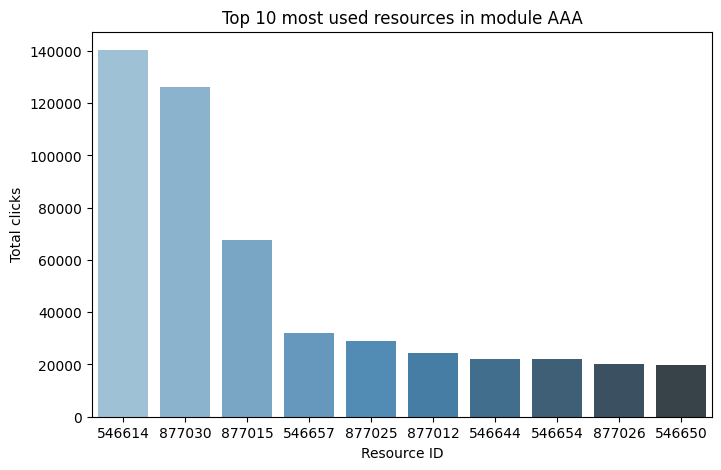

In [46]:
get_10_largest(df_AAA)

In [8]:
info_df_AAA.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [9]:
df_AAA.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [10]:
not_in_list = []
for i in info_df_AAA['id_student'].unique():
    if i not in df_AAA['id_student'].unique():
        not_in_list.append(i)
# print(info_df_AAA.shape)
# print(df_AAA.shape)


print(not_in_list)

[292923, 405961, 2324976, 2365101, 323805, 328734, 488382, 567922, 623710, 1469279]


In [11]:
print(type(df_AAA['id_student'].unique()))

<class 'numpy.ndarray'>


In [13]:
def get_clicks_student(dataframe):
    j = {}
    for i in dataframe['id_student'].unique():
        j[i] = (df_AAA.loc[df_AAA['id_student'] == i, 'sum_click'].sum())
    return j

In [14]:
copy_AAA = df_AAA.copy()

f = get_clicks_student(copy_AAA)
print(f)

{28400: 1435, 30268: 281, 31604: 2158, 32885: 1034, 38053: 2445, 45462: 1492, 58873: 1732, 59185: 1102, 62155: 3388, 63400: 2737, 65002: 176, 70464: 1053, 71361: 2327, 75091: 2992, 57506: 1319, 77367: 680, 94961: 1240, 98094: 2839, 101781: 4104, 102806: 1944, 106577: 733, 104476: 4777, 110175: 998, 114999: 1358, 111717: 2343, 116692: 1108, 127582: 1321, 129955: 1888, 132976: 520, 135335: 73, 134143: 2732, 137873: 5528, 118983: 284, 123044: 2041, 144801: 5645, 146188: 597, 145130: 452, 147756: 1718, 148993: 3812, 235507: 1257, 238007: 1935, 241649: 1892, 248270: 1969, 255548: 2580, 258392: 844, 256815: 1481, 258894: 4963, 241729: 1829, 242793: 658, 246834: 1174, 262934: 2407, 271251: 3348, 279572: 1183, 281250: 130, 282821: 1961, 291334: 5231, 296332: 2152, 298696: 514, 300398: 1997, 287548: 483, 302302: 513, 305539: 68, 306897: 2742, 306466: 1220, 307866: 1476, 312537: 12882, 312782: 281, 155854: 4003, 155550: 1529, 155984: 2645, 159954: 2062, 164259: 466, 167906: 1510, 180753: 2012, 1

In [15]:
print(info_df_AAA['id_student'].nunique())
print(len(f.keys()))

712
702


In [16]:
filtered_info_df_AAA = info_df_AAA[info_df_AAA['id_student'].isin(f.keys())]

In [17]:
filtered_info_df_AAA['id_student'].nunique()    

702

In [18]:
filtered_info_df_AAA['total_clicks'] = filtered_info_df_AAA['id_student'].map(f)



/var/folders/j8/tl0_lbl13hzgnfgmslz4hyfc0000gn/T/ipykernel_12938/371687617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_info_df_AAA['total_clicks'] = filtered_info_df_AAA['id_student'].map(f)


In [26]:
filtered_info_df_AAA['final_result'] = filtered_info_df_AAA['final_result'].apply(lambda x: 1 if x == 'Pass' else 0)
filtered_info_df_AAA.head()


/var/folders/j8/tl0_lbl13hzgnfgmslz4hyfc0000gn/T/ipykernel_12938/4043077762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_info_df_AAA['final_result'] = filtered_info_df_AAA['final_result'].apply(lambda x: 1 if x == 'Pass' else 0)


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,total_clicks
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,1,934
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,1,1435
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,0,281
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,1,2158
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,1,1034


/var/folders/j8/tl0_lbl13hzgnfgmslz4hyfc0000gn/T/ipykernel_28980/1406685687.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='final_result', y='total_clicks', data= filtered_info_df_AAA, jitter = True, palette= 'viridis')


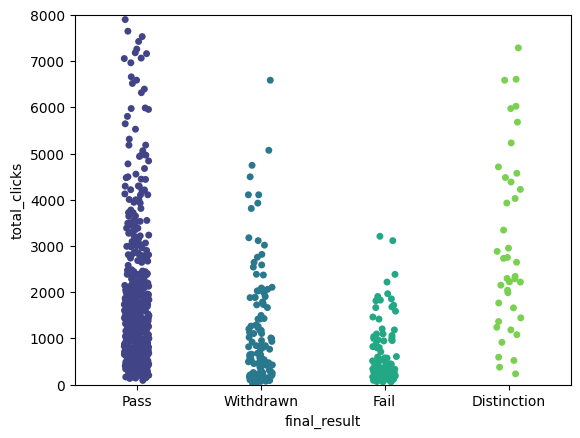

In [80]:
# sns.boxplot(x='final_result', y='total_clicks', data= filtered_info_df_AAA)
# sns.violinplot(x='final_result', y='total_clicks', data= filtered_info_df_AAA)
sns.stripplot(x='final_result', y='total_clicks', data= filtered_info_df_AAA, jitter = True, palette= 'viridis')

plt.ylim(0, 8000)
plt.show()

In [20]:
def result_clicks(dataframe):
    j = {}
    for i in dataframe['final_result'].unique():
        j[i] = (dataframe.loc[dataframe['final_result'] == i, 'total_clicks'].sum())
    passes = len(dataframe[dataframe['final_result'] == 'Pass'])
    fails = len(dataframe[dataframe['final_result'] == 'Fail'])
    withdraws = len(dataframe[dataframe['final_result'] == 'Withdrawn'])
    j['average_pass_clicks'] = j['Pass']/passes
    j['average_fail_clicks'] = j['Fail']/fails
    j['average_withdraw_clicks'] = j['Withdrawn']/withdraws
    return j


d = result_clicks(filtered_info_df_AAA)


In [79]:
d

{'Pass': 931524,
 'Withdrawn': 155993,
 'Fail': 63857,
 'Distinction': 172010,
 'average_pass_clicks': 1912.7802874743327,
 'average_fail_clicks': 701.7252747252747,
 'average_withdraw_clicks': 1356.4608695652173}

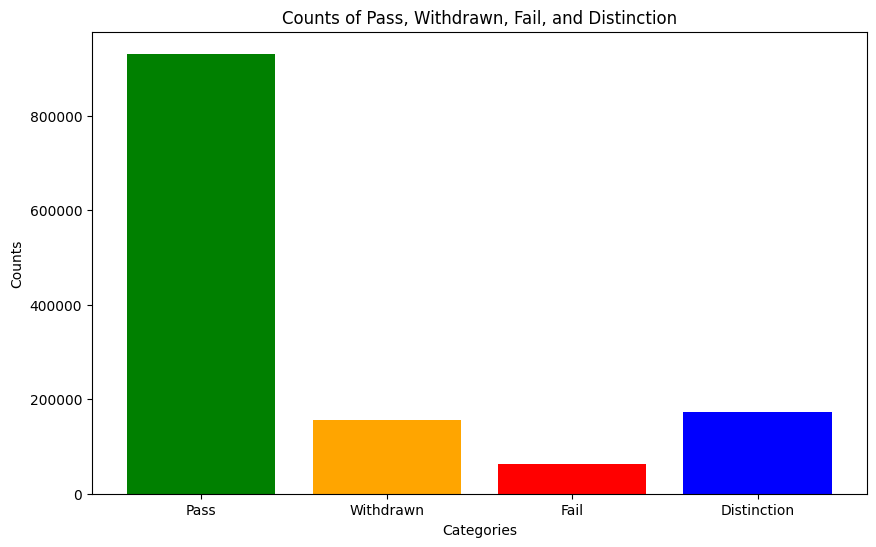

In [21]:
categories = ['Pass', 'Withdrawn', 'Fail', 'Distinction']
counts = [d[category] for category in categories]

plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color=['green', 'orange', 'red', 'blue'])
plt.title('Counts of Pass, Withdrawn, Fail, and Distinction')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.show()


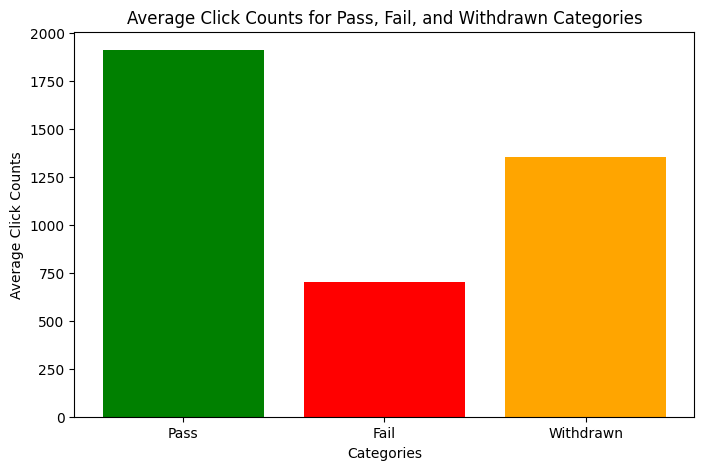

In [22]:
average_clicks = [d['average_pass_clicks'], d['average_fail_clicks'], d['average_withdraw_clicks']]

plt.figure(figsize=(8, 5))
plt.bar(['Pass', 'Fail', 'Withdrawn'], average_clicks, color=['green', 'red', 'orange'])
plt.title('Average Click Counts for Pass, Fail, and Withdrawn Categories')
plt.xlabel('Categories')
plt.ylabel('Average Click Counts')
plt.show()


In [28]:
filtered_df = filtered_info_df_AAA.to_csv('filtered_df.csv')